# 2020 Covid dataset analysed


## Part 1 - Feature Engineering 

In [12]:
import pandas as pd
import tensorflow as tf
from datetime import datetime

In [13]:
df=pd.read_csv('full_grouped.csv').dropna().rename(columns={'Country/Region':'Country'})
df['Date']=pd.to_datetime(df["Date"], format='%Y-%m-%d', errors= 'coerce')
df['delta_t']=df['Date']-df['Date'].min()
df['delta_t']=df['delta_t'].dt.days
df


,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,delta_t
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,187
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,187
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,187
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,187


In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(df)

Now we have to set the target of the analysis. For a certain country, train a model that is trained on its 2020-01 -- 2020-05 dataset such that time is the input and the outputs are #of new cases. It will be tested on 2020-06 -- 2020-07 dataset.

In [15]:
list_of_features=['delta_t','Deaths','Recovered','Active']
list_countries=df.Country.unique()
print(list_countries)
def norm_feature(df,col=None):
    '''
    Given a DataFrame and a column, it normalises the data in a new column called NORM_column
    '''
    if col is None:
        a=(df-df.mean())/df.std()
    else: 
        a=(df[col]-df[col].mean())/df[col].std()
    name='NORM_'+ col
    df[name]=a
features=[]
for feature in list_of_features:
    a='NORM_'+feature
    if a not in features:
        features.append(a)
    if a not in df.columns:
        norm_feature(df=df, col=feature)   
df

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,delta_t,NORM_delta_t,NORM_Deaths,NORM_Recovered,NORM_Active
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0,-1.722838,-0.165931,-0.171166,-0.125422
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0,-1.722838,-0.165931,-0.171166,-0.125422
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0,-1.722838,-0.165931,-0.171166,-0.125422
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0,-1.722838,-0.165931,-0.171166,-0.125422
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0,-1.722838,-0.165931,-0.171166,-0.125422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,187,1.722838,-0.155443,-0.113037,-0.049943
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,187,1.722838,-0.165797,-0.171042,-0.125411
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,187,1.722838,-0.100988,-0.158260,-0.121254
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,187,1.722838,-0.147107,-0.127554,-0.107672


In [16]:
ratio= 0.715


train_split = int(split_fraction * int(df.shape[0]))




def build_data(df,features,c): 
    '''
    Given a country c,the DataFrame, and a list of features, it returns a tuple of x_train, x_test, y_train, y_test
    '''
    a=df.loc[df.Country==c]
    df_train=a.loc[a['NORM_delta_t']<2*ratio]
    df_test=a.drop(df_train.index)
    X_train=tf.convert_to_tensor(df_train.loc[:,features])
    X_test=tf.convert_to_tensor(df_test.loc[:,features])
    y_train=tf.convert_to_tensor(df_train['New cases'])
    y_test=tf.convert_to_tensor(df_test['New cases'])
    return X_train, X_test, y_train, y_test


def build_data_world(df,features,cs):
    '''
    Given a list of countries c,the DataFrame, and a list of features, it returns a tuple of x_train, x_test, y_train, y_test
    '''
    X_train, X_test, y_train, y_test=None,None,None,None
    for c in cs:
        a=df.loc[df.Country==c]
        df_train=a.loc[a['NORM_delta_t']<2*ratio]
        df_test=a.drop(df_train.index)
        if X_train is None or X_test is None or y_train is None or y_test is None:
            X_train=tf.convert_to_tensor(df_train.loc[:,features])
            X_test=tf.convert_to_tensor(df_test.loc[:,features])
            y_train=tf.convert_to_tensor(df_train['New cases'])
            y_test=tf.convert_to_tensor(df_test['New cases'])
        else:
            X_train=tf.add(tf.convert_to_tensor(df_train.loc[:,features]),X_train)
            X_test=tf.add(tf.convert_to_tensor(df_test.loc[:,features]),X_test)
            y_train=tf.add(tf.convert_to_tensor(df_train['New cases']),y_train)
            y_test=tf.add(tf.convert_to_tensor(df_test['New cases']),y_test)
    return X_train, X_test, y_train, y_test
       
    
X_train, X_test, y_train, y_test= build_data_world(df=df,features=features,cs=['Italy'])

    

In [17]:
print(X_train)

tf.Tensor(
[[-1.72283764e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.70441157e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.68598550e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.66755943e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.64913336e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.63070729e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.61228121e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.59385514e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.57542907e+00 -1.65930979e-01 -1.71165777e-01 -1.25422258e-01]
 [-1.55700300e+00 -1.65930979e-01 -1.71165777e-01 -1.25400029e-01]
 [-1.53857693e+00 -1.65930979e-01 -1.71165777e-01 -1.25400029e-01]
 [-1.52015086e+00 -1.65930979e-01 -1.71165777e-01 -1.25400029e-01]
 [-1.50172479e+00 -1.65930979e-01 -1.71165777e-01 -1.25400029e-01]
 [-1.48329872e+00 -1.65930979e-01 -1.71165777e-01 -1.25400029e-01]
 [-1.46487265e+00 -1.65930979e-01 -1.71165777e-01 -

In [6]:
assert(X_train.shape[0]==y_train.shape[0])
assert(X_test.shape[0]==y_test.shape[0])


Now everything is ready to train our model.

## Part 2 - Deep Learning 

In [ ]:
step = 6
past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10

In [18]:
def build_model():
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(units=30,input_shape=[len(features)],activation='selu'),
        tf.keras.layers.Dense(units=20,activation='selu'),
        tf.keras.layers.Dense(units=15, activation='selu'),
        tf.keras.layers.Dense(units=1),
    ])
    model.compile(
    optimizer='adam',
    loss='mae',)
    return model
        

In [19]:
batch_size=10
epochs=294

model=build_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,)

Epoch 1/294
17/17 [==============================] - 1s 13ms/step - loss: 1424.7562 - val_loss: 212.1771
Epoch 2/294
17/17 [==============================] - 0s 4ms/step - loss: 1422.5513 - val_loss: 207.9323
Epoch 3/294
17/17 [==============================] - 0s 8ms/step - loss: 1419.7194 - val_loss: 201.3836
Epoch 4/294
17/17 [==============================] - 0s 4ms/step - loss: 1415.4375 - val_loss: 191.3879
Epoch 5/294
17/17 [==============================] - 0s 4ms/step - loss: 1408.9485 - val_loss: 175.8345
Epoch 6/294
17/17 [==============================] - 0s 3ms/step - loss: 1398.8767 - val_loss: 152.1682
Epoch 7/294
17/17 [==============================] - 0s 4ms/step - loss: 1383.4631 - val_loss: 117.0818
Epoch 8/294
17/17 [==============================] - 0s 3ms/step - loss: 1361.4490 - val_loss: 71.7978
Epoch 9/294
17/17 [==============================] - 0s 3ms/step - loss: 1333.0826 - val_loss: 44.6877
Epoch 10/294
17/17 [==============================] - 0s 3ms/step

,loss,val_loss
0,1424.756226,212.177094
1,1422.551270,207.932312
2,1419.719360,201.383606
3,1415.437500,191.387909
4,1408.948486,175.834473
...,...,...
289,182.637131,109.167473
290,182.562744,91.964142
291,181.463776,106.850960
292,182.012039,99.392311


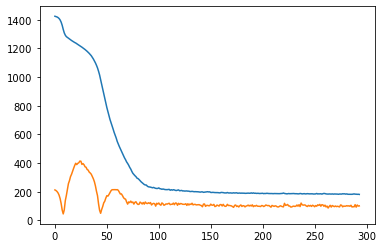

In [20]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot()
history_df

6/6 [==============================] - 0s 3ms/step


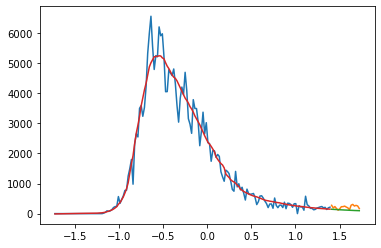

In [21]:
import matplotlib.pyplot as plt
t_train=[0]*X_train.shape[0]
for i in range(X_train.shape[0]):
    t_train[i]=X_train.numpy()[i][0]
t_test=[0]*X_test.shape[0]
for i in range(X_test.shape[0]):
    t_test[i]=X_test.numpy()[i][0]
y_test_predict=model.predict(X_test)
y_train_predict=model.predict(X_train)
plt.plot(t_train,y_train)
plt.plot(t_test,y_test)
plt.plot(t_test,y_test_predict)
plt.plot(t_train,y_train_predict)
plt.show()

In [22]:
list_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G